FiveThirtyEight's 2015 NBA Projections, 4 years later.
By Robert Griffin Powell

I'm a longtime fan of FiveThirtyEight and I love their projections for NBA players. But, when going through their github, I found their projections of the 2015 NBA Draft class, before any of the 60 picks had played a game in the NBA. I will be checking to see how accurate these predictions were, who defined or perfectly matched expectations. 

The FiveThirtyEight dataset comes from their github. It has their names, colleges (ultimately irrelevant for my purposes), projected SPM, and percent chance of becoming a specific role: Bust, superstar, etc. I skipped this since those labels are ultimately subjective and a projected statistic would yield stronger analysis.
https://github.com/fivethirtyeight/data/tree/master/nba-draft-2015

The Basketball-Reference files comes from their set of 2015 and 2014 players, with several columns of both basic and advanced metrics: 

https://www.basketball-reference.com/draft/NBA_2015.html
https://www.basketball-reference.com/draft/NBA_2014.html

538 projected SPM, Statistical Plus/Minus, a statistic that calculates how much better or worse than the average the player is, and they projected what this statistic would be for a player after careers years 2-5. As such, I will be grabbing players from 2014 and 2015 who have played 4 or more seasons. I will then use their BPM (Box Plus/Minus, essentially the same as SPM) and find the difference in Plus/Minus, between the original projection and how they've actually played up to now.

This dataset does not have any foreign players and will not include any, as 538 wanted to avoid players who did not play NCAA college basketball, and thus were in a different league with different talent.

In [1]:
import requests, pandas, numpy, matplotlib.pyplot

#This is FiveThirtyEight's data for projecting draft picks
df2014Project = pandas.read_csv('historical_projections.csv')
df2015Project = pandas.read_csv('historical_projections.csv')

In [2]:
#These are files of the present day stats of 2014 and 2015
#draft picks, including BPM, the stat 538 predicted.
df2014Current = pandas.read_csv('2014CurrentStats.csv')
df2015Current = pandas.read_csv('2015CurrentStats.csv')

In [3]:
#This is taking the 2014 picks from the projections, and then keeping name, position and projected BPM
df2014FinProj = df2014Project[df2014Project['Draft Year'] == 2014]
df2014FinFinProj = df2014FinProj[['Player', 'Projected SPM']]

#Taking the player stats from now, with a minimum of 4 years in the league since the projections were for SPM 5 years out, from years 2 to 5 of theses player's careers.
df2014Now = df2014Current[['Player', 'Yrs', 'BPM']]
df2014NowNow = df2014Now[df2014Now['Yrs'] >= 4]


In [4]:
#Now I'm merging the data sets by name and calculating the combined
df2014Super = pandas.merge(df2014FinFinProj, df2014NowNow, on = 'Player')
df2014Super.head(11)
df2014Super['Adjusted BPM'] = df2014Super['BPM'] - df2014Super['Projected SPM']

In [5]:
#Repeat process with 2015 players
df2015FinProj = df2015Project[df2015Project['Draft Year'] == 2015]
df2015FinFinProj = df2015FinProj[['Player', 'Projected SPM']]

df2015Now = df2015Current[['Player', 'Yrs', 'BPM']]
df2015NowNow = df2015Now[df2015Now['Yrs'] >= 4]

df2015Super = pandas.merge(df2015FinFinProj, df2015NowNow, on = 'Player')
df2015Super.head(11)
df2015Super['Adjusted BPM'] = df2015Super['BPM'] - df2015Super['Projected SPM']

I have now made the data sets to hold the adjusted BPM, based on the projections from the 2015 FiveThirtyEight. I will now be combining both in a mega set so that I can analyzise both and find the biggest misses and best projections (Plus graphs!)

In [6]:
dfFinalBPM = df2015Super.append(df2014Super)
dfFinalBPM.sort_values(by = ['Adjusted BPM'])


,Player,Projected SPM,Yrs,BPM,Adjusted BPM
19,Adreian Payne,-0.761344,4.0,-5.5,-4.738656
15,Tyler Ennis,-0.392782,4.0,-4.6,-4.207218
8,James Young,0.023822,4.0,-4.0,-4.023822
3,Jahlil Okafor,0.521661,4.0,-3.5,-4.021661
1,Noah Vonleh,0.885169,5.0,-2.6,-3.485169
7,Nik Stauskas,0.097645,5.0,-3.2,-3.297645
3,Andrew Wiggins,0.694105,5.0,-2.5,-3.194105
19,Jarell Martin,-0.721740,4.0,-3.8,-3.078260
2,Stanley Johnson,0.679493,4.0,-2.1,-2.779493
7,Trey Lyles,0.267509,4.0,-2.4,-2.667509


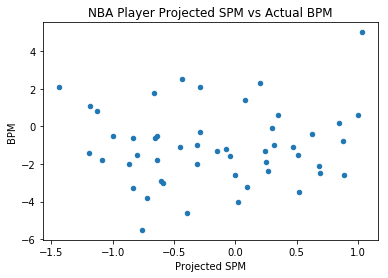

In [7]:
dfFinalBPM.plot(kind = 'scatter', x = 'Projected SPM', y = 'BPM', title = 'NBA Player Projected SPM vs Actual BPM')

Yay, now I get to talk about basketball! 

The players with 'Adjusted BPM' less than -4 were Adriean Payne, Tyler Ennis, James Young, and Jahil Okafor and the projections really underestimated how bad they could be. Those first 3 players have 4 years in the league, sure, but none even played in the NBA this year, instead for overseas or G League (essentially minor league NBA) teams. Okafor did play this year but sporadically. The main thing I notice with the first three, is that they were mid level picks, and were college prospects were considered ok, and have decent, if unremarkable careers, thus when the 3 of them follow a very unsuccessful career and bust with very low BPM, the projections are worse than if the players were always predicted to end up out of the league quickly. Okafor did play this year but he was the 3rd pick and was highly touted entering the league, so while he's a decent player who will hang on for a while, he's never reaching that projected height. Similar to Okafor, Noah Vonleh (The 5th worst Adjusted BPM) was the 9th pick in the 2014 draft, a draft that was believed to have several trancendent superstars, Vonleh being counted amoung those who were seen as having that potential. For him to basically be a bench player is a big reversal on what his BPM was projected to be. All this shows that the projections badly missed any players who became busts or unplayable and were drafted early. It never really took into account the possiblity of players never showing the promise they had in college.

This is also partially true for the players who overperformed their projections: Dwight Powell, Delon Wright and Montrez Harrell had very low expectations and predictions and were picked very low, so by even having sustainable NBA careers, they have cruised by their projections. By contrast, these players showed comparatively less potential but while none of those 3 players are major stars, they are getting work and playing more than 5 minutes a game. This is how we see the other major blind spot of FiveThirtyEight's projections: players drafted very low(second round, very late first round) who play above their perceived potential.

As to the accuracy, of the 50 players, 14 of them were within -/+ 1 BPM of 0, which suggested to me that they were ultimately... ok on the projections. Its clearly not perfect, even when they're right, for example Karl-Anthony Towns had the highest projected SPM and even he was miss-projected, as his BPM has been even higher.

Ultimately, with how FiveThirtyEight projections worked out, I notice that they missed the worst busts and the biggest surprises. It was a very consistent, safe and generalized projection set but it was simply way off/unprepared for major draft surprises, especially after the first 15-ish picks.